## Stack Scipy: conjunto de bibliotecas para computação cientifíca

Assume-se o conhecimento básico da linguagem de programação Python.

A linguagem de programação Python se consolidou como o principal instrumento para se fazer "data science". Grande parte de sua utilidade provém de seu grande e ativo ecossistema de pacotes para execução de tarefas científicas: Numpy para manipulação de dados numéricos, Pandas para manipulação de dados tabulares e rotulados, Scipy como biblioteca de funções científicas, Matplotlib para produção de gráficos de qualidade e Scikit-learn para rotinas de machine learning.


## 1) Numpy ([página oficial](http://numpy.org/), [referência rápida](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf))

A biblioteca Numpy é a fundação das operações de todas as outras bibliotecas que se utilizam de suas estruturas de dados (Numpy arrays) e de suas operações numéricas otimizadas (vetorizadas). É uma biblioteca estável, rápida e em contínuo desenvolvimento.

O principal problema resolvido pelo Numpy é processamento rápido de arrays (vetores ou matrizes).

Python é uma linguagem de alto nível e por essa razão facilita muito a vida para os seus usuários, que não precisam se preocupar em declarar os tipos das variáveis e nem lidar com as alocações de memória.

Mas em contra partida, a linguagem Python perde em velocidade e desempenho para outras linguagens de mais baixo nível, como C e Fortran. Porque isso acontece?

Python é uma linguagem de tipagem dinâmica, você não precisa definir o tipo da variável na sua declaração, o próprio interpretador faz isso pelo usuário. 

Ver os exemplos abaixo:

In [1]:
# numeros inteiros
a = 5
b = 5
print('soma inteiros: ', a + b)

# strings
a = 'banana'
b = 'maça'
print('soma strings: ', a + b)

# listas
a = [1, 2, 3]
b = [4, 5, 6]
print('soma listas: ', a + b)

soma inteiros:  10
soma strings:  bananamaça
soma listas:  [1, 2, 3, 4, 5, 6]


Podemos perceber que a operação '+' funcionou para todos os tipos de dados (números, strings e listas). Apesar disso facilitar a vida do programador, essa facilidade exige que o interpretador do programa verifique o tipo dos dados sempre que for fazer uma operação com eles e isso é um problema quando se lida com muitos dados, pois o programa pode acabar ficando mais lento.

O numpy fornece a estrutura de dados ndarray (array de n dimensões). Para utiliza-la é necessário declarar o tipo de variável que será armazenada, dessa forma, pode-se construir vetores e matrizes com tipos fixos de dados e evitar o custo de verificação de tipos. Dessa forma, as operações ficam mais rápidas.

In [4]:
import random
import numpy as np

#criar um array de tamanho 3 preenchido com 0s
a = np.zeros(3)
print(a)

#tipo de a 
print('tipo de a', type(a))

#numpy arrays são como as listas de python,  porém seus elementos são todos do mesmo tipo (dtype)'''

#tipo do elemento de a
print('tipo do elemento (dtype) de a', type(a[0]))

#principais dtype: float64 (padrão), int64, bool

#criar um array de tamanho 3 preenchido com 0s utilizando inteiros
b = np.zeros(3, dtype='float32')
print('tipo de elemento de b', type(b[0]))

[0. 0. 0.]
tipo de a <class 'numpy.ndarray'>
tipo do elemento (dtype) de a <class 'numpy.float64'>
tipo de elemento de b <class 'numpy.float32'>


### Atributos básicos do Numpy Array

In [6]:
#array de uma dimensão
a = np.array([1, 2, 3])

#array de duas dimensões
b = np.array([(1, 2, 3),(4, 5, 6)])

#array de três dimensões
c = np.array([[(1.5,2,3), (4,5,6)], [(3,2,1), (4,5,6)]], dtype = float)

print('c ndim', c.ndim)
print('c shape', c.shape)
print('c size', c.size)
print('c dtype', c.dtype)


c ndim 3
c shape (2, 2, 3)
c size 12
c dtype float64


### Indexação (acessando elementos do array)

In [8]:
#caso de uma dimensão
a
a[0]  #primeiro elemento, em python vetores iniciam em 0
a[2]  #ultimo elemento
a[-1] #ultimo elemento, usando indice negativo

#qual valor de a[-2]?

#caso de duas dimensões
b[0,0]  #elemento da primeira linha e da primeira coluna
b[1,2]  #elemento da segunda linha e da terceira coluna
b[1,-1] #elemento da segunda linha e da ultima coluna


6

### Slice (acessando sub-arrays)

o slice acontece através da sintaxe x[start:stop:step]
 * start: indice onde inicia o slice
 * stop: indice onde termina o slice
 * step: é o tamanho do passo para percorrer os indices entre 

veja os exemplos abaixo

In [10]:
x = np.arange(5)

x[:3]    #primeiro tres elementos
x[1:3]   #elementos internos 
x[:1]    #todos os elementos excluindo o primeiro
x[::2]   #elemento sim, elemento nao
x[::-1]  #ordem inversa

#caso de duas dimensões, acessando colunas e linhas
b[:, 0]  #primeira coluna de b
b[0, :]  #primeira linha de b

#qual o retorno de b[0]?

array([1, 2, 3])

### Reshape (alterando o formato do array)

In [11]:
#converter o array de uma dimensão com nove elementos em um array de duas dimensões (3x3)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
mod_x = x.reshape(3, 3)
mod_x

#adicionar uma dimensão extra
y = np.array([1, 2, 3])
y
mod_y = y.reshape((3, 1))
mod_y

array([[1],
       [2],
       [3]])

### Operações com arrays

Outro ponto que torna o uso do numpy vantajoso, são suas operações vetorizadas. A vetorização é uma técnica que permite executar uma operação em vários elementos do array ao mesmo tempo, fazendo com que processamento fique muito mais eficiente. Muito útil para substituir loops onde é necessário aplicar a operação em cada elemento do array. Na biblioteca numpy, as operações aritméticas básicas entre os arrays, são automaticamente vetorizadas, mas também pode-se utilizar um conjunto de funções para realizar essas operações, essas funções são chamadas universal functions (Ufuncs)

#### loop comum Python

In [12]:
%%time

n=1000000
soma=0
for i in range(n):
    x = random.uniform(0, 1)
    soma += x

CPU times: user 352 ms, sys: 0 ns, total: 352 ms
Wall time: 353 ms


#### loop vetorizado com numpy

In [16]:
%%time

x = np.random.uniform(0,1,n)
y = np.sum(x**2)


CPU times: user 18.1 ms, sys: 0 ns, total: 18.1 ms
Wall time: 15.3 ms


_Repare a diferença de tempo de execução! Uma diferença de quase 10 vezes!_ 

A vetorização é uma técnica utilizada para **eliminar loops Python**, já que esses são normalmente muitos lentos para grande volumes de dados.

No exemplo anterior:
 * x**2 é uma operação aritmética regular de exponenciação, como envolve um array o numpy vetoriza essa operação automaticamente

Ao invés de x**2, poderíamos ter usado a Ufuncs np.exp(), o que produziria o mesmo resultado.

Segue uma lista de alguns operadores aritméticos e sua Ufunc com descrição.

| Operador	| ufunc |	descrição
|-----------|-------|--------------------------
| + | np.add        |	     Adição (1 + 1 = 2)
| -	| np.subtract   |	 Subtração (3 - 2 = 1)
| -	| np.negative   |	 Negação (-2)
| *	| np.multiply   |	 Multiplicação (2 * 3 = 6)
| /	| np.divide     |	 Divisão (3 / 2 = 1.5)
| **| np.power      |	 Exponenciação (2 ** 3 = 8)
| %	| np.mod        |	     Resto (9 % 4 = 1)

Utilizando as Ufuncs, realize a soma, subtração, divisão, multiplicação e exponenciação das matrizes m1 e m2.

In [45]:
m1 = np.array([(1, 1, 1),(1, 1, 1), (1, 1, 1)])
m2 = np.array([(3, 3, 3),(3, 3, 3), (3, 3, 3)])

No exemplo anterior, utilizamos dois arrays do mesmo tamanho (3, 3). O numpy consegue realizar operações com arrays de diferentes tamanhos, gerando resultados que seguem um regra especifica da biblioteca. A técnica para se vetorizar operações de arrays de diferentes tamanhos se chama Broadcasting.

## 2) Matplotlib ([página oficial](https://matplotlib.org/), [referência rápida](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf))

Matplotlib é uma biblioteca gráfica projetada para computação científica. Gera gráficos 2D e 3D em vários formatos (PDF, PNG, JPG...)

Matplotlib possuí duas APIs, uma voltada para os usuários do Matlab, pois segue o estilo sintaxe do famoso programa, outra voltada para os usuários de Python, pois segue a sintaxe orientada à objetos. Vamos utilizar a sintaxe orientado à objetos, sendo a preferência dos usuários de Python, por explicitar melhor o que está sendo feito.

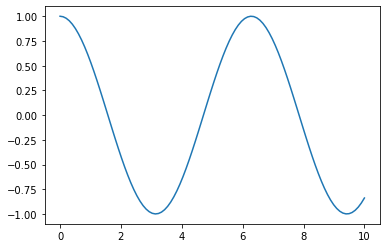

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = np.linspace(0, 10, 100)
y = np.cos(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

Notar os dois objetos retornado pela chamada plt.subplots():

 * fig é uma instância do objeto Figure, o local onde o gráfico é desenhado
 * ax é uma instância do objeto AxesSubplot, os eixos que envolvem a figura

### Pequenos ajustes

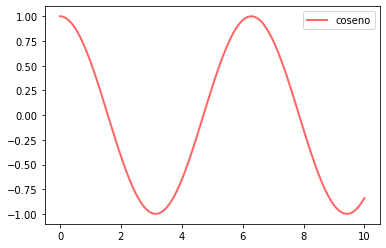

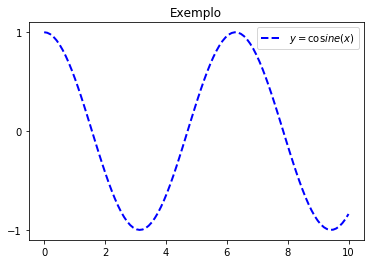

In [18]:
#alterando espessura das linhas, cor, transparência e adicionando legenda
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='coseno', alpha=0.6)
ax.legend()
plt.show()

#incluindo string Latex para formatação matemática
fig, ax = plt.subplots()
ax.plot(x, y, 'b--', linewidth=2, label='$y=\cosine(x)$')
ax.legend()
ax.set_yticks([-1, 0, 1])  #alterando a marcação do eixo y
ax.set_title('Exemplo')    #incluindo título
plt.show()

### Múltiplos gráficos em um mesmo eixo

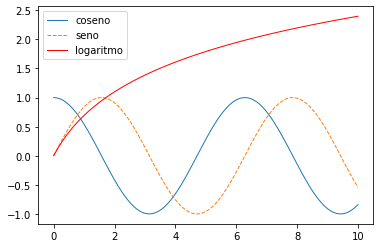

In [19]:
y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.log(x+1)

fig, ax = plt.subplots()
ax.plot(x, y1, linewidth=1, label='coseno')
ax.plot(x, y2, '--', linewidth=1, label='seno')
ax.plot(x, y3, 'r', linewidth=1, label='logaritmo')
ax.legend()
plt.show()


### Múltiplos gráficos

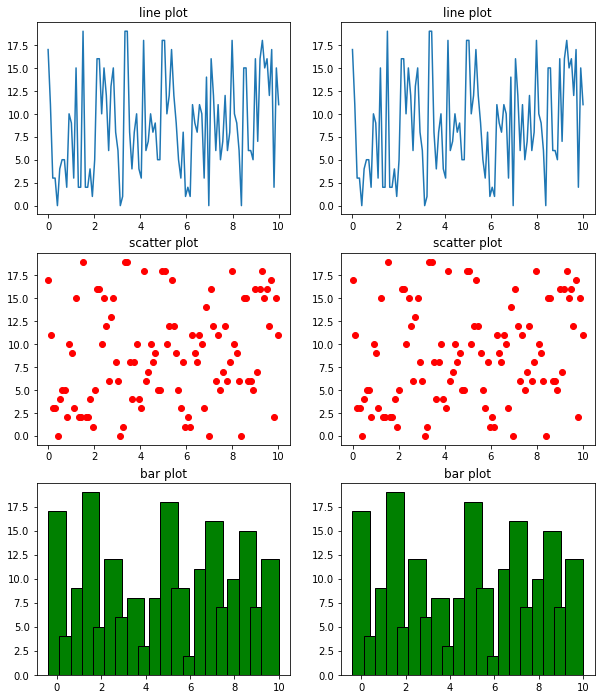

In [21]:
x = np.linspace(0, 10, 100)
y4 = np.random.randint(20, size=100)

fig, axes = plt.subplots(3, 2, figsize=(10, 12))

#gráfico 1
axes[0,0].plot(x, y4)
axes[0,0].set_title('line plot')

#gráfico 2
axes[1,0].scatter(x, y4, color='r')
axes[1,0].set_title('scatter plot')

#gráfico 3
axes[2,0].bar(x[::5], y4[::5], color='green', edgecolor='black')    #notar o uso do slice [::5]
axes[2,0].set_title('bar plot')

#gráfico 1
axes[0,1].plot(x, y4)
axes[0,1].set_title('line plot')

#gráfico 2
axes[1,1].scatter(x, y4, color='r')
axes[1,1].set_title('scatter plot')

#gráfico 3
axes[2,1].bar(x[::5], y4[::5], color='green', edgecolor='black')    #notar o uso do slice [::5]
axes[2,1].set_title('bar plot')


plt.show()
#se quiser salvar o gráfico gerado, basta descomentar o comando abaixo
#fig.savefig('nome_da_figura.png')

## 3) Scipy ([página oficial](https://www.scipy.org/), [referência rápida](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_SciPy_Cheat_Sheet_Linear_Algebra.pdf))

Assim como o Numpy, o Scipy é uma biblioteca estável, madura e amplamente utilizada. Suas rotinas encapsulam códigos de bibliotecas numéricas do Fortran consagradas como LAPACK.

Enquanto o Numpy realiza armazenamento e operações entre arrays de maneira eficiente, o Scipy é um pacote que contém várias ferramentas construídas sobre o código Numpy, utilizando esses arrays e suas operações. Portanto, para utilizar o Scipy, é necessário ter instalado o Numpy.

Não há muito o que aprender sobre o Scipy, pois são inúmeras ferramentas de computação científicas. Vamos mostrar dois pacotes dos mais utilizados: linalg, para algebra linear (matrizes e vetores) e stats, para estatísticas nos arrays.

### Linalg 

Repare que scipy.linalg contém e expande numpy.linalg

Utilizando o scipy, resolver o sistema linear abaixo:

$$\begin{eqnarray}
4x - y - 3z = 15 \\
3x - 2y + 5z = -7  \\
2x + 3y + 4z = 7 \\
\end{eqnarray}$$

Em notação de matriz

$$
\begin{bmatrix}
4 & -1 & -3 \\
3 & -2 & 5 \\
2 & 3 & 4 \\		
\end{bmatrix}
\cdot
\begin{bmatrix}
x \\
y \\
z \\			
\end{bmatrix}
=
\begin{bmatrix}
15 \\
-7 \\
7 \\
\end{bmatrix}
$$

Vamos chamar a matrix de coeficientes de A


In [22]:
from scipy import linalg

A = np.array([[4, -1, -3], [-3, -2, 5], [2, 3, 4]])
b = np.array([15, -7, 7])

sol = np.linalg.solve(A, b)
print("x={0}, y={1}, z={2}".format(*sol))

#verificando o resultado
np.dot(A, sol)

x=3.909090909090909, y=-1.0000000000000002, z=0.5454545454545455


array([15., -7.,  7.])

### Stats

O pacote scipy.stats fornece ferramentas para lidar com: 
 * variáveis aleatórias (densidades, distribuições acumulativas, reamostragem)
 * estimação
 * testes estatísticos
 
Exemplo: plotar um histograma de dados com comportamento gaussiano e sua distribuição acumulada

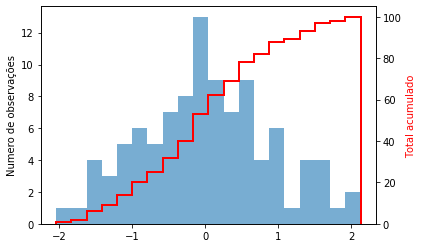

In [23]:
from scipy.stats import norm, cumfreq
from random import uniform
import matplotlib.pyplot as plt
%matplotlib inline

#curva normal com média 0 e desvio padrao 1
curve = norm(0, 1)

#gerando 100 observações com curva normal
x = curve.rvs(100)

fig, ax = plt.subplots()
ax.hist(x, alpha=0.6, bins=20)   #histograma com 20 casas
ax.set_ylabel("Numero de observações")

ax2 = ax.twinx()  #copia de eixo para mudar escala e cor
ax2.hist(x, cumulative=True, bins=20, histtype='step', color='red', linewidth=2)
ax2.set_ylabel("Total acumulado", color='red')

plt.show()

## 4) Pandas ([página oficial](https://pandas.pydata.org/), [referência rápida](https://assets.datacamp.com/blog_assets/PandasPythonForDataScience.pd))

Pandas é um pacote com diversas ferramentas eficientes para análise de dados. Assim como o Scipy, Pandas utiliza as estruturas e operações dos arrays do Numpy, que funcionam muito bem para cálculos numéricos, mas também os expande, dando mais flexibilidade com a possibilidade de usar eixos e indices rotulados, procedimentos para lidar com conjuntos de dados incompletos (missing data) e rotinas para facilitar a leitura de dados em formatos consagrados (CSV, Excel, SQL ...). 

As duas estruturas de dados mais importantes do Pandas são: Series e DataFrame.

### Series
Pode-ser pensar que é um array unidimensional. Toda Series possui um indice (index), ele pode ser usado para rotular cada elemento desse array, funcionando de maneira muito parecida com um dicionário Python. 

Obs: se os seus dados possuem um eixo de tempo, escolher esse eixo como index facilita muito a manipulação e análise de dados. O Pandas é uma ferramenta extremamente poderosa para se trabalhar com séries temporais.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#criar um array ficticio
idade = [40, 48, 53, 42, 55, 38, 29, 31, 48, 44]

#criando um objeto Series
s = pd.Series(idade, name='idades')
print(s) #nesse exemplo, os indices são numerais 0, 1, 2....

#os slices funcionam como no numpy
print(s[2:5])
print(s[0])

#funções estatísticas embutidas
s.mean()
s.max()
s.min()

print(s.describe()) #resumo estatistico

#adicionando index rotulado
s.index = ['Jessica', 'Vanessa', 'Roberto', 'Saulo', 'Fabio', 'Juliana', 'Tatiana', 'Jose', 'Eliane', 'Tomas']
print(s)

#pode-se utilizar os rótulos para acessar os elementos correspondendes
print('idade de Fabio é', s['Fabio'])

#acessar os valores 
s.values

#acessar o index
s.index

0    40
1    48
2    53
3    42
4    55
5    38
6    29
7    31
8    48
9    44
Name: idades, dtype: int64
2    53
3    42
4    55
Name: idades, dtype: int64
40
count    10.000000
mean     42.800000
std       8.625543
min      29.000000
25%      38.500000
50%      43.000000
75%      48.000000
max      55.000000
Name: idades, dtype: float64
Jessica    40
Vanessa    48
Roberto    53
Saulo      42
Fabio      55
Juliana    38
Tatiana    29
Jose       31
Eliane     48
Tomas      44
Name: idades, dtype: int64
idade de Fabio é 55


Index(['Jessica', 'Vanessa', 'Roberto', 'Saulo', 'Fabio', 'Juliana', 'Tatiana',
       'Jose', 'Eliane', 'Tomas'],
      dtype='object')

### Dataframe
DataFrame é uma generalização de Series, pois permite a inclusão de diversas colunas. Pode ser pensando como uma planilha de Excel extremamente eficiente. É uma excelente ferramenta para analisar dados tabulares (organizados em linhas e colunas). 

Vamos utiliza-lo para abrir o arquivo dados_saude_cancer.csv (dados fictícios apenas para ilustrar os exemplos)

In [25]:
df = pd.read_csv('data/dados_saude_cancer.csv')
type(df)

#o arquivo é uma tabela, essa tabela é representada no formato linha X colunas
print(df)

      Nome  Idade  Colesterol  Anos fumante Atividade física Ingestão alcool  \
0  Jessica     40          44            13              Não             Sim   
1  Vanessa     48          55             0              Não             Não   
2  Roberto     53          65            30              Não             Sim   
3    Saulo     42          38            15              Sim             Sim   
4    Fabio     55          52            10              Sim             Sim   
5  Juliana     38          44             0              Não             Não   
6  Tatiana     29          60             0              Sim             Não   
7     Jose     31          75            10              Não             Sim   
8   Eliane     48          55             0              Sim             Não   
9    Tomas     44          50            22              Não             Não   

  Histórico familiar  Nível de glicose  
0                Não               100  
1                Não                9

In [26]:
df.describe() #resumo estatistico das variáveis numéricas

,Idade,Colesterol,Anos fumante,Nível de glicose
count,10.000000,10.000000,10.000000,10.00000
mean,42.800000,53.800000,10.000000,97.90000
std,8.625543,10.932114,10.424331,7.04667
min,29.000000,38.000000,0.000000,90.00000
25%,38.500000,45.500000,0.000000,92.00000
50%,43.000000,53.500000,10.000000,97.50000
75%,48.000000,58.750000,14.500000,103.75000
max,55.000000,75.000000,30.000000,110.00000


In [27]:
#para selecionar as linhas, opera de maneira semelhante com os objetos python
print(df[2:5])  #mostra da linha 2 até 5 (excetuando a 5)

#para selecionar as colunas, passamos uma lista com os nomes das colunas desejadas
print(df[['Nome', 'Idade', 'Anos fumante']])

#para se selecionar linhas e colunas usando números inteiros se usa
print(df.iloc[1:4, 0:3])

#para selecionar linhas e colunas usando tanto inteiros como strings
print(df.loc[1:4, :'Colesterol'])
#repare que iloc exclui o último inteiro da seleção, loc não faz essa exclusão

      Nome  Idade  Colesterol  Anos fumante Atividade física Ingestão alcool  \
2  Roberto     53          65            30              Não             Sim   
3    Saulo     42          38            15              Sim             Sim   
4    Fabio     55          52            10              Sim             Sim   

  Histórico familiar  Nível de glicose  
2                Sim               110  
3                Sim               105  
4                Não                98  
      Nome  Idade  Anos fumante
0  Jessica     40            13
1  Vanessa     48             0
2  Roberto     53            30
3    Saulo     42            15
4    Fabio     55            10
5  Juliana     38             0
6  Tatiana     29             0
7     Jose     31            10
8   Eliane     48             0
9    Tomas     44            22
      Nome  Idade  Colesterol
1  Vanessa     48          55
2  Roberto     53          65
3    Saulo     42          38
      Nome  Idade  Colesterol
1  Vanessa   

In [29]:
#uma maneira de limpar o objeto e só trabalhar com os dados de interesse é redefini-lo
df = df[['Nome', 'Idade', 'Anos fumante']]
print(df)

#também pode-se criar uma coluna ou renomea-las
df['Idade inicio fumar'] = df['Idade'] - df['Anos fumante']
print(df)

      Nome  Idade  Anos fumante
0  Jessica     40            13
1  Vanessa     48             0
2  Roberto     53            30
3    Saulo     42            15
4    Fabio     55            10
5  Juliana     38             0
6  Tatiana     29             0
7     Jose     31            10
8   Eliane     48             0
9    Tomas     44            22
      Nome  Idade  Anos fumante  Idade inicio fumar
0  Jessica     40            13                  27
1  Vanessa     48             0                  48
2  Roberto     53            30                  23
3    Saulo     42            15                  27
4    Fabio     55            10                  45
5  Juliana     38             0                  38
6  Tatiana     29             0                  29
7     Jose     31            10                  21
8   Eliane     48             0                  48
9    Tomas     44            22                  22


Uma coisa interessante do Pandas é que seus objetos Series e DataFrame, tem métodos para visualizar os dados integrados com o Matplotlib 

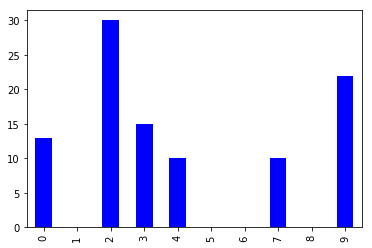

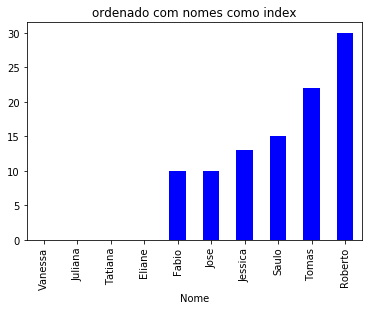

In [57]:
df['Anos fumante'].plot(kind='bar', color='b')
plt.show()

#repare que os eixos marcam números inteiros de 0 a 9, vamos colocar a variável 'nome' como index desse df
#e vamos ordenar os valores em ordem crescente
df2  = df.set_index('Nome')
df2 = df2.sort_values(by='Anos fumante', ascending=True)
df2['Anos fumante'].plot(kind='bar', title="ordenado com nomes como index", color='b')
plt.show()

## 5) Scikit-learn ([página oficial](https://scikit-learn.org/), [referência rápida](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf))

Scikit-learn é uma das melhores e mais populares bibliotecas de machine learning para Python. Além dos algoritmos eficientes, uma de suas vantagens é a interface homogênea para utilizar seus algoritmos. Essa interface é conhecida como API. Uma vez entendido seu funcionamente básico para um modelo, é fácil utiliza-la para qualquer outro modelo. 

### Representação dos dados

A entrada de dados para os modelos do Scikit também é padronizada. É importante entender o seu formato, pois é basicamente o mesmo para todos os seus modelos.

Os dados de entrada devem estar dispostos em uma matriz de duas dimensões, onde as linhas correspondem as amostras ou observações (samples) e as colunas aos atributos mensurados (features).

![](feature_matrix.png)

Os dados de entrada devem ser colocados nessa disposição, construindo a feature_matrix. Essa será a matriz de entrada para todos os algortimos, também é chamada por convençao de X.

Outro dado de entrada utilizado em aprendizagem de máuqina é o vetor de rótulos ou valores observados (target_vector). Esse é o vetor o qual contém a informação para o modelo realizar o ajuste durante o procedimento de otimização. Normalmente é unidimensional e tem o mesmo tamanho do número de amostras da feature_matrix.


### API do scikit-learn

O básico da API é organizar as etapas de aprendizagem da seguinte forma:

 1. Escolher o modelo utilizado
 2. Escolher os parâmetros utilizados pelo modelo
 3. Formatar os dados de entrada como feature matrix (x) e target vector (y)
 4. Ajustar o modelo aos dados através do método .fit()
 5. Realizar previões para novos dados através do método .predict()
 
Vamos mostrar um exemplo de regressão linear feita pelo Scikit-learn

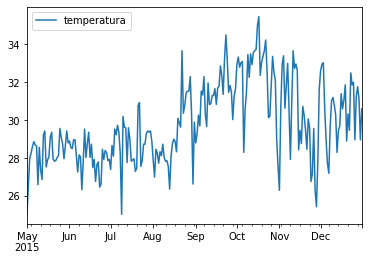

In [30]:
import pandas as pd
import numpy as np
from dateutil.parser import parse

######## processamento da entrada #################3
dado_bruto = pd.read_csv('data/teste_temperatura.csv')

#inserir um objeto datetime para criar ordem temporal, os dados estão amostrados de 6 em 6 horas
eixo_temporal = pd.to_datetime(dado_bruto['date']) + pd.TimedeltaIndex(dado_bruto['hour'], unit='H')
dados = dado_bruto.set_index(pd.DatetimeIndex(eixo_temporal))

#removendo colunas desnecessárias e renomeando atributos
dados.drop(columns=['date', 'hour'], inplace=True)
dados.rename(columns={'dry_bulb_temperature':'temperatura'}, inplace=True)

#reamostrando para média diária
dado_diario = dados.resample('D').mean()
dado_diario.plot()

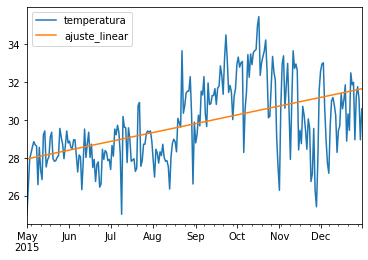

In [31]:
# aplicacao da API scikit-learn para regressao linear

# passo 1: importacao do modelo escolhido, no caso, LinearRegression
from sklearn.linear_model import LinearRegression

# passo 2: ajuste dos parâmetros do modelo, no caso, não é necessário
model = LinearRegression()

# passo 3: formatar os dados para entrada no modelo
x = np.arange(len(dado_diario))  
y = dado_diario.values

# passo 4: realizar o ajuste do modelo nos dados
model.fit(x[:, np.newaxis], y)

# passo 5: realizar a previsão
ajuste_linear = model.predict(x[:, np.newaxis])

# visualização
dado_diario['ajuste_linear'] = ajuste_linear
dado_diario.plot()

## Referências de material:
 * Python Data Science Handbook, Jake VanderPlas
 * Quantitative Economics with Python, Thomas J. Sargent and John Stachurski